# Welcome to *Hold the Gold's* D.C. housing analysis presentation#

### The following analysis--by utilizing Zillow's extensive housing data--will examine the best real estate zip codes to invest in today.###


![pic](https://1.bp.blogspot.com/-jm3DNs93jbE/VIzbmGsvJqI/AAAAAAAAz9g/lwZW02QNWfk/s1600/WashingtonDC-zip-code-map-shaded.JPG) 


### **Goal:**

To find the top 5 zipcodes for our savvy investors to deploy capital into for maximum financial return.

### **Assumptions:**

1. You are an investor with a minimum of $100,000 to deploy upfront.
2. Your time horizon for investment is 5-10 years (this is not a liquid investment).
3. You seek to maximize growth potential by tapping into home value appreciation in one of America's fastest growing metro areas.
4.  Your threshold for volatility is low (note that no investment is guaranteed and any investment with *Hold the Gold* is subject to future market conditions).

### **Background:**

**Why the D.C. metropolitan area?**


In [2]:
max profit
min volatitily 
max potential for home value increase while rental income supplmentation
metro access 
upcoming fast growth trending area
heavy insulation from federal govenrment home
upcoming amazon headquarters
future growth oritented 
risk vs profitability
ROI yield

The DC area is home to numerous 10/10 GreatSchools Rated elementary, middle, and high schools
90-100	Most Competitive Redfin Compete Score
Most homes get multiple offers, often with waived contingencies.
Homes typically receive 1 offer.
Homes sell for around list price and go pending in around 11 days.
Hot Homes can sell for about 3% above list price and go pending in around 5 days.

walkscore.com
Washington D.C. is the 7th most walkable large city in the US with 601,723 residents.

Washington D.C. has excellent public transportation and is somewhat bikeable.77 walk score 71 transit score

SyntaxError: invalid syntax (<ipython-input-2-855680b452d2>, line 1)

### **Methodology:**

### **Exploratory Data Analysis:**

In [43]:
## first import all relevant libraries
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm

In [44]:
## read in data
df=pd.read_csv("zillow_data.csv")

In [45]:
## preview data
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [46]:
## select only data from D.C. area
df_dc=df[df["State"]=="DC"]

In [47]:
df_dc_1=df[df["State"]=="DC"]


In [48]:
## drop unneeded columns
## dropped RegionID, City, State, Metro, CountyName
df_dc=df_dc.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [49]:
##Rename RegionID to zipcode
df_dc.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
df_dc.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
29,20002,94300.0,94000.0,93700.0,93600.0,93400.0,93400.0,93400.0,93600.0,94000.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300
33,20009,178800.0,179200.0,179600.0,180000.0,180300.0,180700.0,181200.0,181800.0,182600.0,...,1020000,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200
181,20011,118900.0,118500.0,118200.0,117800.0,117600.0,117400.0,117400.0,117500.0,117800.0,...,582200,586200,591200,593200,591200,589500,590800,599100,611400,619100
246,20019,91300.0,91000.0,90600.0,90400.0,90100.0,89900.0,89700.0,89600.0,89600.0,...,291100,296300,302500,306700,308800,310800,313400,314100,311800,308600
258,20001,92000.0,92600.0,93200.0,93900.0,94600.0,95400.0,96100.0,96800.0,97700.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300


In [50]:
## Reset dataframe index and drop old index related to original zillow dataset
df_dc.reset_index(drop=True)

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,20002,94300.0,94000.0,93700.0,93600.0,93400.0,93400.0,93400.0,93600.0,94000.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300
1,20009,178800.0,179200.0,179600.0,180000.0,180300.0,180700.0,181200.0,181800.0,182600.0,...,1020000,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200
2,20011,118900.0,118500.0,118200.0,117800.0,117600.0,117400.0,117400.0,117500.0,117800.0,...,582200,586200,591200,593200,591200,589500,590800,599100,611400,619100
3,20019,91300.0,91000.0,90600.0,90400.0,90100.0,89900.0,89700.0,89600.0,89600.0,...,291100,296300,302500,306700,308800,310800,313400,314100,311800,308600
4,20001,92000.0,92600.0,93200.0,93900.0,94600.0,95400.0,96100.0,96800.0,97700.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300
5,20020,104500.0,103800.0,103000.0,102200.0,101400.0,100600.0,100000.0,99500.0,99200.0,...,314700,317600,321800,324500,324800,324900,324900,327300,332800,337000
6,20008,450100.0,448200.0,446300.0,444500.0,442900.0,441600.0,440700.0,440100.0,440100.0,...,1501600,1508800,1509700,1506000,1509100,1514300,1519400,1527900,1539600,1545900
7,20003,130000.0,130100.0,130200.0,130400.0,130600.0,130900.0,131400.0,131900.0,132700.0,...,801000,807200,811900,813400,814600,814600,815300,817300,820200,820200
8,20032,85700.0,85500.0,85400.0,85200.0,85000.0,84800.0,84600.0,84400.0,84200.0,...,288100,293400,297800,301500,303700,304000,304600,306800,308200,307400
9,20016,362000.0,361200.0,360300.0,359400.0,358500.0,357700.0,357000.0,356500.0,356400.0,...,1202900,1198700,1196400,1190400,1184800,1183600,1186600,1190000,1196000,1199500


In [51]:
##cast all zipcodes to string from integer
df_dc["Zipcode"]=df_dc["Zipcode"].astype(str)


In [52]:
## transpose dates to rows
df_dc=df_dc.transpose()
df_dc.head()

,29,33,181,246,258,402,1263,1448,1707,2066,2581,2653,5297,5339,5453,5805,6484,6887
Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
1996-04,94300,178800,118900,91300,92000,104500,450100,130000,85700,362000,110500,358100,209800,121700,123000,277800,312400,185000
1996-05,94000,179200,118500,91000,92600,103800,448200,130100,85500,361200,111200,356000,208200,121400,122400,275800,311000,184900
1996-06,93700,179600,118200,90600,93200,103000,446300,130200,85400,360300,112000,353900,206600,121200,121800,273700,309800,184700
1996-07,93600,180000,117800,90400,93900,102200,444500,130400,85200,359400,112900,351700,205000,121000,121200,271600,308700,184400


In [53]:
## Renaming all columns to reflect the 18 zipcodes of D.C.

new_header=df_dc.iloc[0] ## grab first row for new header
df_dc=df_dc[1:] ## take all data after first row
df_dc.columns=new_header ## assign all columns as previous dataframe's first row


In [54]:
df_dc.head()

Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
1996-04,94300,178800,118900,91300,92000,104500,450100,130000,85700,362000,110500,358100,209800,121700,123000,277800,312400,185000
1996-05,94000,179200,118500,91000,92600,103800,448200,130100,85500,361200,111200,356000,208200,121400,122400,275800,311000,184900
1996-06,93700,179600,118200,90600,93200,103000,446300,130200,85400,360300,112000,353900,206600,121200,121800,273700,309800,184700
1996-07,93600,180000,117800,90400,93900,102200,444500,130400,85200,359400,112900,351700,205000,121000,121200,271600,308700,184400
1996-08,93400,180300,117600,90100,94600,101400,442900,130600,85000,358500,113800,349600,203300,120900,120700,269500,307900,184100


In [55]:
df_dc.index=pd.to_datetime(df_dc.index)
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 18 columns):
20002    265 non-null object
20009    265 non-null object
20011    265 non-null object
20019    265 non-null object
20001    265 non-null object
20020    265 non-null object
20008    265 non-null object
20003    265 non-null object
20032    265 non-null object
20016    265 non-null object
20010    265 non-null object
20007    265 non-null object
20024    265 non-null object
20017    265 non-null object
20018    265 non-null object
20037    265 non-null object
20015    265 non-null object
20012    265 non-null object
dtypes: object(18)
memory usage: 39.3+ KB


In [56]:
df_dc.reset_index()
df_dc.head()

Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
1996-04-01,94300,178800,118900,91300,92000,104500,450100,130000,85700,362000,110500,358100,209800,121700,123000,277800,312400,185000
1996-05-01,94000,179200,118500,91000,92600,103800,448200,130100,85500,361200,111200,356000,208200,121400,122400,275800,311000,184900
1996-06-01,93700,179600,118200,90600,93200,103000,446300,130200,85400,360300,112000,353900,206600,121200,121800,273700,309800,184700
1996-07-01,93600,180000,117800,90400,93900,102200,444500,130400,85200,359400,112900,351700,205000,121000,121200,271600,308700,184400
1996-08-01,93400,180300,117600,90100,94600,101400,442900,130600,85000,358500,113800,349600,203300,120900,120700,269500,307900,184100


In [57]:
## cast all prices from strings to integers
df_dc=df_dc.astype(int)


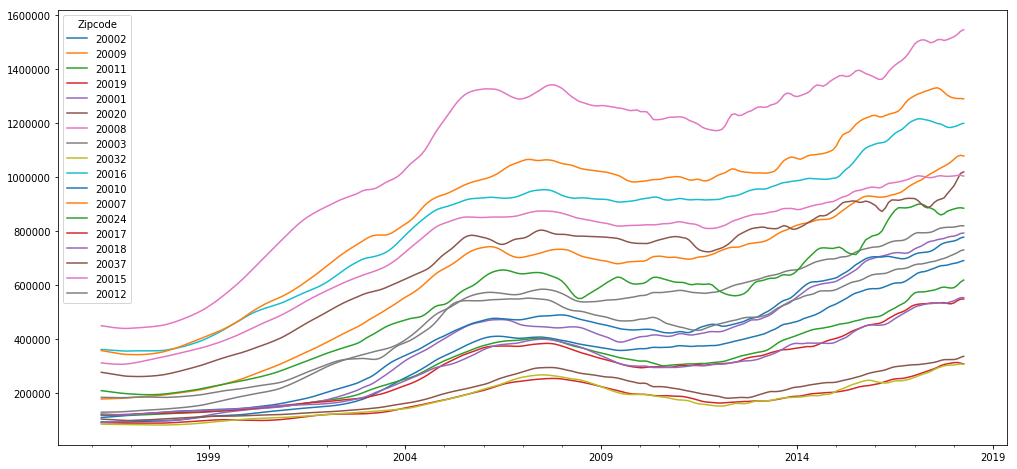

In [58]:
df_dc.plot(figsize=(17,8))
##top 3 zip codes have consitstently been top 3 performers for the last 20 years
## bottom 3 zipcodes display little change over time in price compared to top priced zip codes
## all zip codes display a similar trend with a an inflection point for the year 2008 (housing recession)


In [59]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

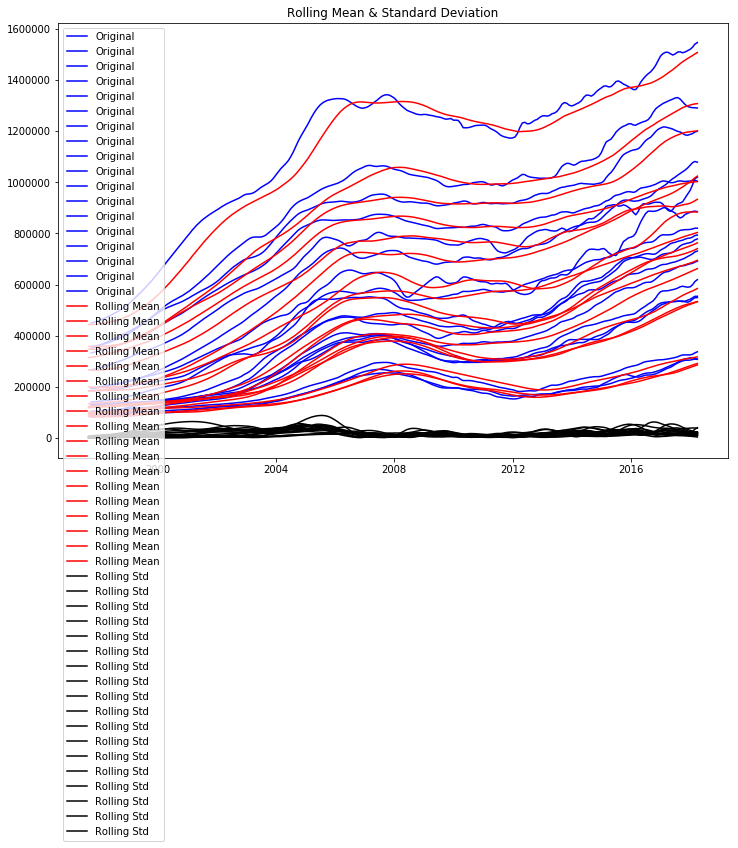

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [60]:
#test the stationarity of the untransformed dataset
test_stationarity(df_dc, 18)

## As the rolling mean for all zip codes shows, 
##the assumption of stationarity is not met, as rolling mean is not constant over time


In [ ]:
data = df_dc["20008"]
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

In [ ]:
data = df_dc["20007"]
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

In [ ]:
data = df_dc["20009"]
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

In [61]:
data = df_dc["20001"]
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

(-0.7863232950406892, 0.8231065220249374, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 4087.3255592934966)
Results of Dickey-Fuller Test:
Test Statistic                  -0.786323
p-value                          0.823107
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [62]:
from statsmodels.tsa.stattools import adfuller
data = df_dc["20001"]
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

(-0.7863232950406892, 0.8231065220249374, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 4087.3255592934966)
Results of Dickey-Fuller Test:
Test Statistic                  -0.786323
p-value                          0.823107
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [63]:
def test_dickey_fuller(ts_data_frame):
    for col in df_dc.columns:
        dftest = adfuller(ts_data_frame[col])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#         for key,value in dftest[4].items():
#             dfoutput['Critical Value (%s)'%key] = value
        print(dftest)

        print ('Results of Dickey-Fuller Test:')

        print(dfoutput)    

In [64]:
df_dc.columns

Index(['20002', '20009', '20011', '20019', '20001', '20020', '20008', '20003',
       '20032', '20016', '20010', '20007', '20024', '20017', '20018', '20037',
       '20015', '20012'],
      dtype='object', name='Zipcode')

In [65]:
test_dickey_fuller(df_dc)

(-0.5461367553749569, 0.8826944742052973, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 3920.545252411292)
Results of Dickey-Fuller Test:
Test Statistic                  -0.546137
p-value                          0.882694
#Lags Used                      15.000000
Number of Observations Used    249.000000
dtype: float64
(-1.1189148131844875, 0.7074702578291568, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 4121.4250877836475)
Results of Dickey-Fuller Test:
Test Statistic                  -1.118915
p-value                          0.707470
#Lags Used                      14.000000
Number of Observations Used    250.000000
dtype: float64
(-0.6378014655638256, 0.8622096679826863, 16, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 3985.499935374562)
Results of Dickey-Fuller Test:
Test Statistic                  -0.637801
p-value                          0.862210
#Lags 

In [66]:
data = df_dc["20009"]
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

(-1.1189148131844875, 0.7074702578291568, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 4121.4250877836475)
Results of Dickey-Fuller Test:
Test Statistic                  -1.118915
p-value                          0.707470
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


Requirments
- Baseline model
- Staitonarity (e.g. trends, seasonal patterns, cyclical patterns, differencing, Dickey Fuller Test)  
- ACF
- PACF
- At least AR and MA models
- Evaluation metric  

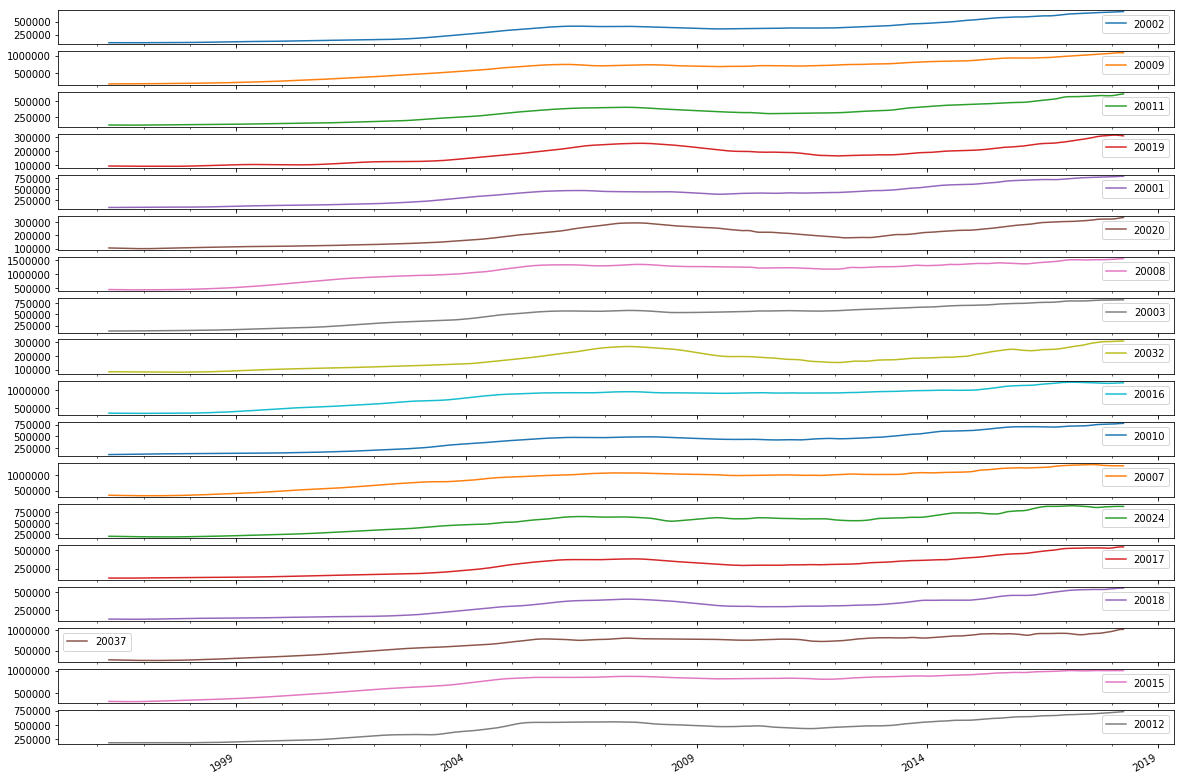

In [67]:
df_dc.plot(figsize = (20,15), subplots=True, legend=True)
plt.show()

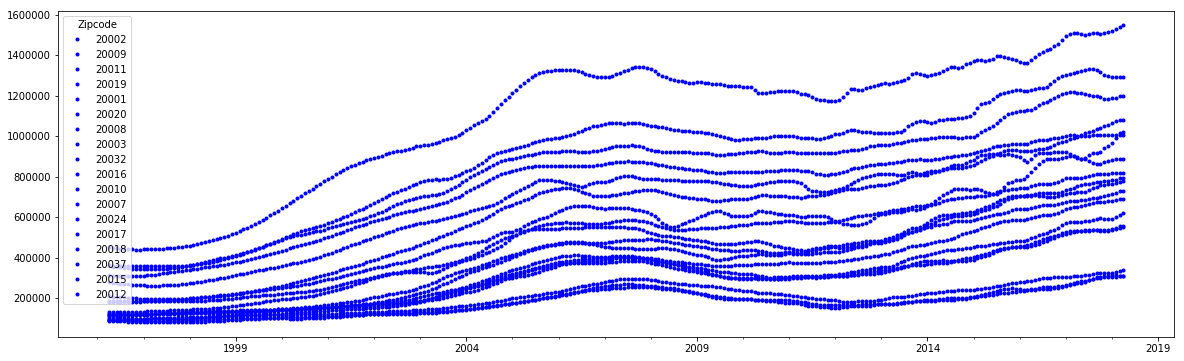

In [68]:
df_dc.plot(figsize = (20,6), style = ".b")
import matplotlib.pyplot as plt
plt.show()

### Detrending data

#### Zipcode 20008

In [69]:
## Log transformation on zipcode 20008 and then perfomed Dickey_fuller test
##after transformation, p-value within critical range and can reject null hypothesis (stationry assumption met)

In [70]:
def log_transformation(ts_data_frame):
    for col in ts_data_frame.columns:
        col= pd.Series(np.log(df_dc[col]))
        dftest = adfuller(col)
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
            print(dftest)

            print ('Results of Dickey-Fuller Test:')

            print(dfoutput)

In [71]:
log_transformation(df_dc)

(-1.7606562155852494, 0.40016220791536494, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -2487.4396905315675)
Results of Dickey-Fuller Test:
Test Statistic                  -1.760656
p-value                          0.400162
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
dtype: float64
(-1.7606562155852494, 0.40016220791536494, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -2487.4396905315675)
Results of Dickey-Fuller Test:
Test Statistic                  -1.760656
p-value                          0.400162
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
dtype: float64
(-1.7606562155852494, 0.40016220791536494, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -2487.4396905315675)
Results 

(-1.555856693320986, 0.5057214120214291, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -2449.172947653783)
Results of Dickey-Fuller Test:
Test Statistic                  -1.555857
p-value                          0.505721
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
dtype: float64
(-1.555856693320986, 0.5057214120214291, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -2449.172947653783)
Results of Dickey-Fuller Test:
Test Statistic                  -1.555857
p-value                          0.505721
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
dtype: float64
(-1.555856693320986, 0.5057214120214291, 14, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, -2449.172947653783)
Results of Dickey

(-3.04048924734073, 0.03128234711164218, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, -2718.350106355788)
Results of Dickey-Fuller Test:
Test Statistic                  -3.040489
p-value                          0.031282
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
(-2.0540177422987727, 0.2634014708210831, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, -2455.7076592392077)
Results of Dickey-Fuller Test:
Test Statistic                  -2.054018
p-value                          0.263401
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
dtype: float64
(-2.0540177422987727, 0.2634014708210831, 15, 249, {'1%': -3.4568881317725864, '5%': -2.873218

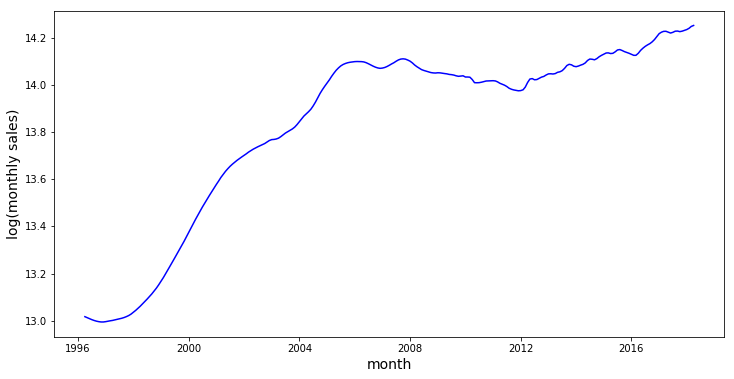

In [72]:
log_2008 = pd.Series(np.log(df_dc["20008"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_2008, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [73]:
data = log_2008
dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)


(-3.44412382463593, 0.00954356745494694, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, -2366.5978750425043)
Results of Dickey-Fuller Test:
Test Statistic                  -3.444124
p-value                          0.009544
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


### Zipcode 20016

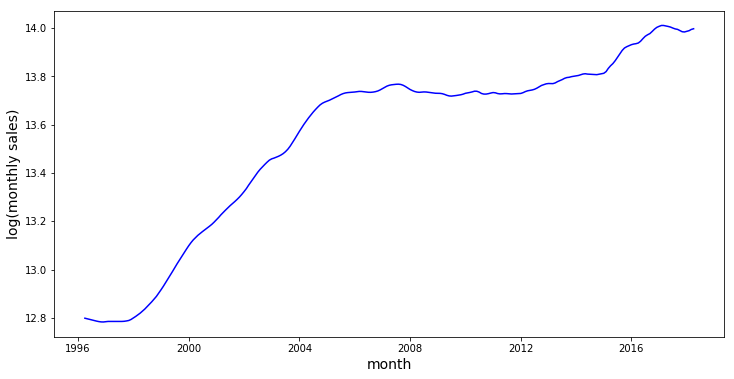

In [74]:
log_20016 = pd.Series(np.log(df_dc["20016"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_20016, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [75]:
log_data_20016 = log_20016
dftest = adfuller(log_data_20016)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

(-3.3889941353000412, 0.011339831733137061, 16, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -2665.311749921332)
Results of Dickey-Fuller Test:
Test Statistic                  -3.388994
p-value                          0.011340
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


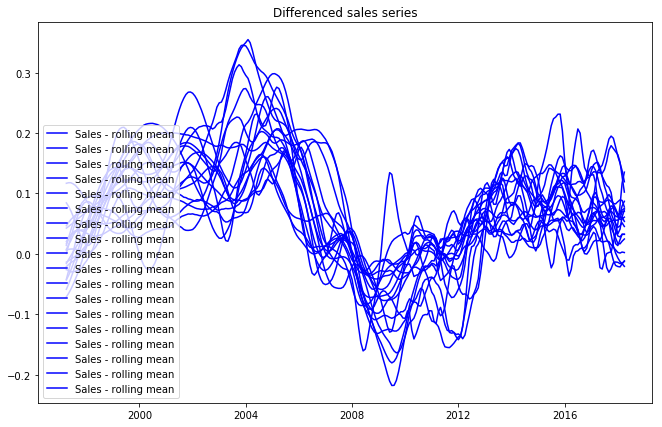

In [163]:
## rolling average set to 6 months
df_dc_log=np.log(df_dc)
dc_diff = df_dc_log.diff(periods=12)
dc_diff.head(10)

fig = plt.figure(figsize=(11,7))
plt.plot(dc_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [170]:
dc_diff= dc_diff[12:]
dc_diff.head(10)

Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
1998-04-01,0.054780,0.077814,0.054419,0.037326,0.023693,0.078660,0.060014,0.070851,0.008348,0.034676,0.073705,0.081701,0.044541,0.030137,0.081104,0.073208,0.095654,0.006427
1998-05-01,0.063370,0.080904,0.053411,0.044841,0.034334,0.078135,0.067490,0.071811,0.019048,0.042758,0.070963,0.092262,0.054877,0.029240,0.076752,0.083000,0.095481,0.010147
1998-06-01,0.074773,0.083912,0.053195,0.054480,0.048743,0.077617,0.075520,0.074782,0.029711,0.051573,0.068252,0.102045,0.064603,0.029923,0.071707,0.091914,0.095564,0.015983
1998-07-01,0.087958,0.087407,0.051376,0.062927,0.065788,0.076129,0.083642,0.078431,0.041451,0.061366,0.066361,0.111332,0.073228,0.030627,0.065975,0.100644,0.095366,0.022341
1998-08-01,0.101949,0.090332,0.050391,0.072425,0.084503,0.075560,0.091827,0.083353,0.051898,0.071044,0.064539,0.119350,0.081738,0.032122,0.060301,0.108495,0.095477,0.029726
1998-09-01,0.116637,0.094170,0.049412,0.079612,0.104758,0.075070,0.099860,0.089571,0.063402,0.080860,0.063465,0.126124,0.088632,0.033610,0.053944,0.115814,0.096192,0.038140
1998-10-01,0.130179,0.097904,0.049991,0.087757,0.125577,0.073698,0.108111,0.096280,0.074714,0.090243,0.061627,0.131928,0.094846,0.035885,0.048384,0.121896,0.096868,0.048068
1998-11-01,0.139673,0.101999,0.050524,0.093586,0.145046,0.073293,0.116136,0.103448,0.087011,0.099712,0.060579,0.136744,0.100373,0.038122,0.043616,0.127789,0.098076,0.057369
1998-12-01,0.147115,0.106333,0.051011,0.097123,0.162871,0.071947,0.124064,0.112927,0.096627,0.108826,0.058009,0.139713,0.105209,0.040316,0.038898,0.132654,0.099505,0.067512
1999-01-01,0.150518,0.110424,0.052254,0.099611,0.177147,0.069743,0.131621,0.122039,0.107164,0.116832,0.056186,0.141509,0.109458,0.043250,0.036476,0.136910,0.100825,0.075841


In [171]:
rolmean = dc_diff.rolling(window = 4).mean()
rolmean=rolmean[3:]
rolmean.head()
test_dickey_fuller(rolmean)

(-2.845131150852596, 0.05211066786393501, 15, 222, {'1%': -3.460154163751041, '5%': -2.874648939216792, '10%': -2.5737567259151044}, -2636.0844919794295)
Results of Dickey-Fuller Test:
Test Statistic                  -2.845131
p-value                          0.052111
#Lags Used                      15.000000
Number of Observations Used    222.000000
dtype: float64
(-2.128176879598205, 0.23333648897217485, 15, 222, {'1%': -3.460154163751041, '5%': -2.874648939216792, '10%': -2.5737567259151044}, -2744.6967545155317)
Results of Dickey-Fuller Test:
Test Statistic                  -2.128177
p-value                          0.233336
#Lags Used                      15.000000
Number of Observations Used    222.000000
dtype: float64
(-3.6272525960491993, 0.005260888668481982, 15, 222, {'1%': -3.460154163751041, '5%': -2.874648939216792, '10%': -2.5737567259151044}, -2625.1097380287306)
Results of Dickey-Fuller Test:
Test Statistic                  -3.627253
p-value                          0.

In [172]:
rolmean.dropna(inplace=True)
rolmean.tail(5)

Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
2017-12-01,0.086982,0.085565,0.084586,0.173682,0.073234,0.066770,0.039561,0.051230,0.188382,-0.002189,0.075924,0.025061,-0.020783,0.044669,0.065040,0.014492,0.013397,0.054613
2018-01-01,0.078768,0.084743,0.065290,0.171773,0.071390,0.065210,0.030630,0.043891,0.181361,-0.011743,0.074137,0.010071,-0.016658,0.031302,0.054859,0.026286,0.008920,0.055564
2018-02-01,0.069948,0.085459,0.050205,0.164906,0.067828,0.064153,0.023983,0.036608,0.170093,-0.018031,0.070713,-0.001106,-0.014522,0.022767,0.049601,0.045603,0.005453,0.056812
2018-03-01,0.063737,0.086773,0.046081,0.153360,0.063688,0.067373,0.020348,0.032137,0.156721,-0.019449,0.069266,-0.008441,-0.014691,0.021791,0.048184,0.070202,0.003466,0.060185
2018-04-01,0.060197,0.085514,0.052039,0.136607,0.059128,0.073502,0.019930,0.030649,0.142241,-0.017581,0.069906,-0.013987,-0.014442,0.025618,0.046829,0.095591,0.002315,0.063882


/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


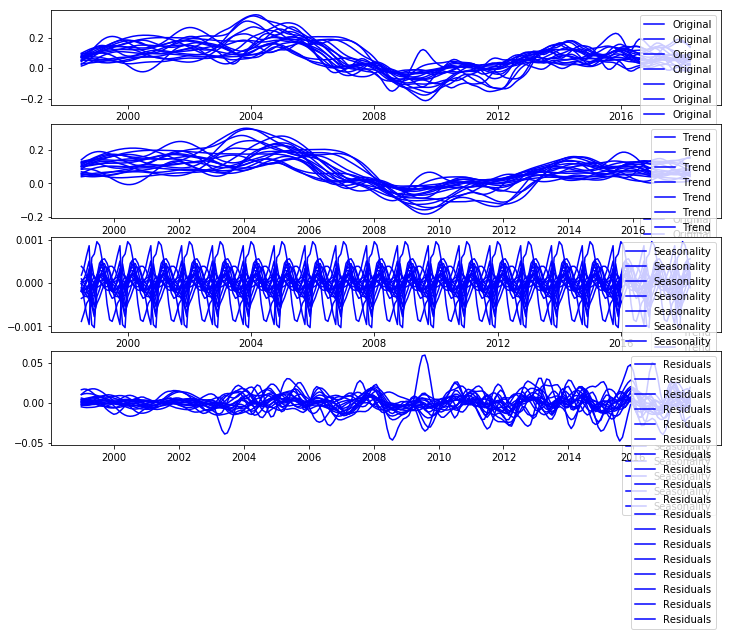

In [173]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [185]:
df=decomposition.resid.dropna()
df.tail()

Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
2017-06-01,0.003706,0.005302,0.009430,-0.006857,0.000781,-0.005935,0.013554,-0.001954,0.014671,0.011723,-0.007988,0.010440,0.007731,0.010821,0.023393,-0.009275,0.000454,0.001711
2017-07-01,0.000049,0.005871,0.004003,-0.009914,0.000759,-0.009479,0.005074,-0.005443,0.011617,0.008173,-0.008803,0.012967,-0.007716,0.005197,0.018260,-0.020233,-0.002915,-0.000782
2017-08-01,0.000858,0.006258,0.002792,-0.008797,0.000543,-0.011068,0.000038,-0.004484,0.009368,0.004155,-0.005222,0.016325,-0.021780,0.001321,0.011491,-0.022885,-0.003016,-0.003410
2017-09-01,0.005077,0.006205,0.005210,-0.001881,0.001041,-0.008732,-0.000851,0.000234,0.012556,0.001152,0.002389,0.017670,-0.029972,0.000392,0.003822,-0.019383,-0.000630,-0.004512
2017-10-01,0.009004,0.005244,0.007906,0.008343,0.003404,-0.004100,-0.000082,0.005777,0.019317,-0.001941,0.010080,0.014720,-0.031020,-0.000226,-0.003233,-0.017028,0.001294,-0.003958


In [186]:
test_dickey_fuller(df)

(-4.524183094138631, 0.00017777386961599398, 14, 211, {'1%': -3.46172743446274, '5%': -2.8753374677799957, '10%': -2.574124089081557}, -2440.465802421221)
Results of Dickey-Fuller Test:
Test Statistic                  -4.524183
p-value                          0.000178
#Lags Used                      14.000000
Number of Observations Used    211.000000
dtype: float64
(-5.036599972220695, 1.8774546354371565e-05, 12, 213, {'1%': -3.461429147102264, '5%': -2.875206950587861, '10%': -2.5740544497344002}, -2593.810130739161)
Results of Dickey-Fuller Test:
Test Statistic                  -5.036600
p-value                          0.000019
#Lags Used                      12.000000
Number of Observations Used    213.000000
dtype: float64
(-3.4052881060140674, 0.010779915984867529, 14, 211, {'1%': -3.46172743446274, '5%': -2.8753374677799957, '10%': -2.574124089081557}, -2477.3611394835248)
Results of Dickey-Fuller Test:
Test Statistic                  -3.405288
p-value                          

### 1.0.8 ACF


In [111]:
dc_diff.head(10)

Zipcode,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
1996-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04-01,1600.0,7800.0,900.0,-1900.0,8100.0,-4300.0,-7100.0,6200.0,-2200.0,-4900.0,13700.0,-15100.0,-14400.0,2500.0,100.0,-15800.0,4400.0,1100.0
1997-05-01,2300.0,8300.0,1800.0,-1600.0,7600.0,-2900.0,-4200.0,6900.0,-2300.0,-4100.0,13900.0,-12500.0,-13200.0,3300.0,1700.0,-13500.0,8400.0,1400.0
1997-06-01,2900.0,8900.0,2600.0,-1300.0,6900.0,-1400.0,-1400.0,7600.0,-2500.0,-3200.0,14000.0,-9500.0,-11800.0,3900.0,3300.0,-10900.0,12300.0,1500.0
1997-07-01,3200.0,9400.0,3600.0,-1100.0,6100.0,200.0,1400.0,8100.0,-2500.0,-2300.0,13900.0,-6100.0,-10200.0,4400.0,4900.0,-8100.0,16100.0,1500.0


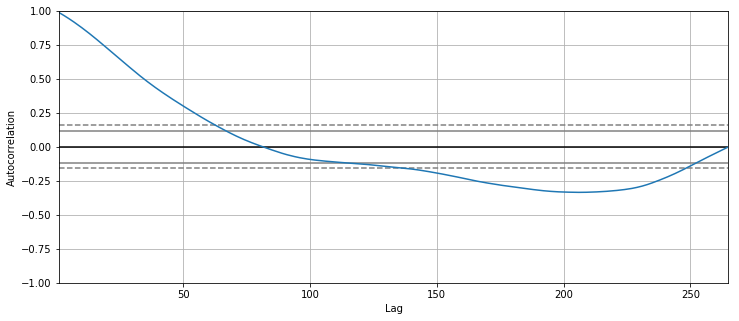

In [112]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(log_data_20016);

### **Results:**

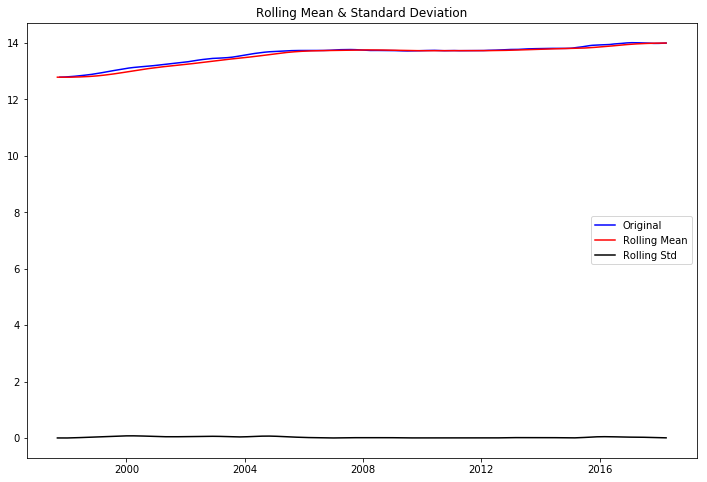

Results of Dickey-Fuller Test:
Test Statistic                  -3.388994
p-value                          0.011340
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [113]:
test_stationarity(log_data_20016, 18)

In [114]:
##The Partial Autocorrelation Function

In [115]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(diet, lags = 100);

NameError: name 'diet' is not defined

### **Recommendations:**

A high-level overview of your methodology and findings, including the 5 zipcodes you recommend investing in
A brief explanation of what metrics you defined as "best" in order complete this project

In [ ]:
df_dc.to_csv("zillow_dc_cleaned.csv")